## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Code

In [2]:
# tendencia - para onde meu dado vai conforme o tempo passa (evolucao temporal) - direcao
# sazonalidade - entender como funcionam as oscilacoes da serie temporal - recorrencia das oscilacoes
# residuo - o que sobra do sinal - que não traz informação revelante

In [3]:
df_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

In [4]:
df = pd.read_csv(df_path)

df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
df.index = pd.to_datetime(df.DATE,format = "%m-%d-%Y")

In [7]:
df.drop("DATE", inplace=True, axis=1)

In [8]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [9]:
df.loc['1985-05-01']

Value    55.3151
Name: 1985-05-01 00:00:00, dtype: float64

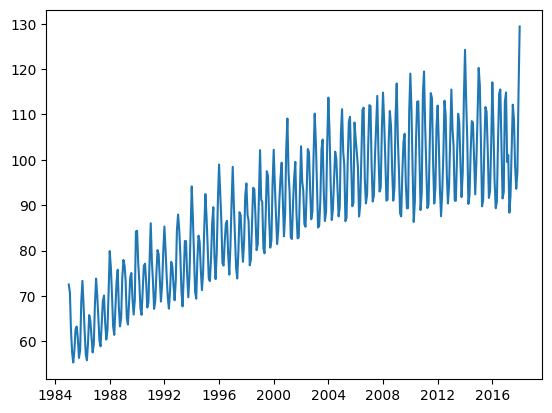

In [10]:
plt.plot(df.index, df.Value)
plt.show()

In [11]:
results = seasonal_decompose(df)

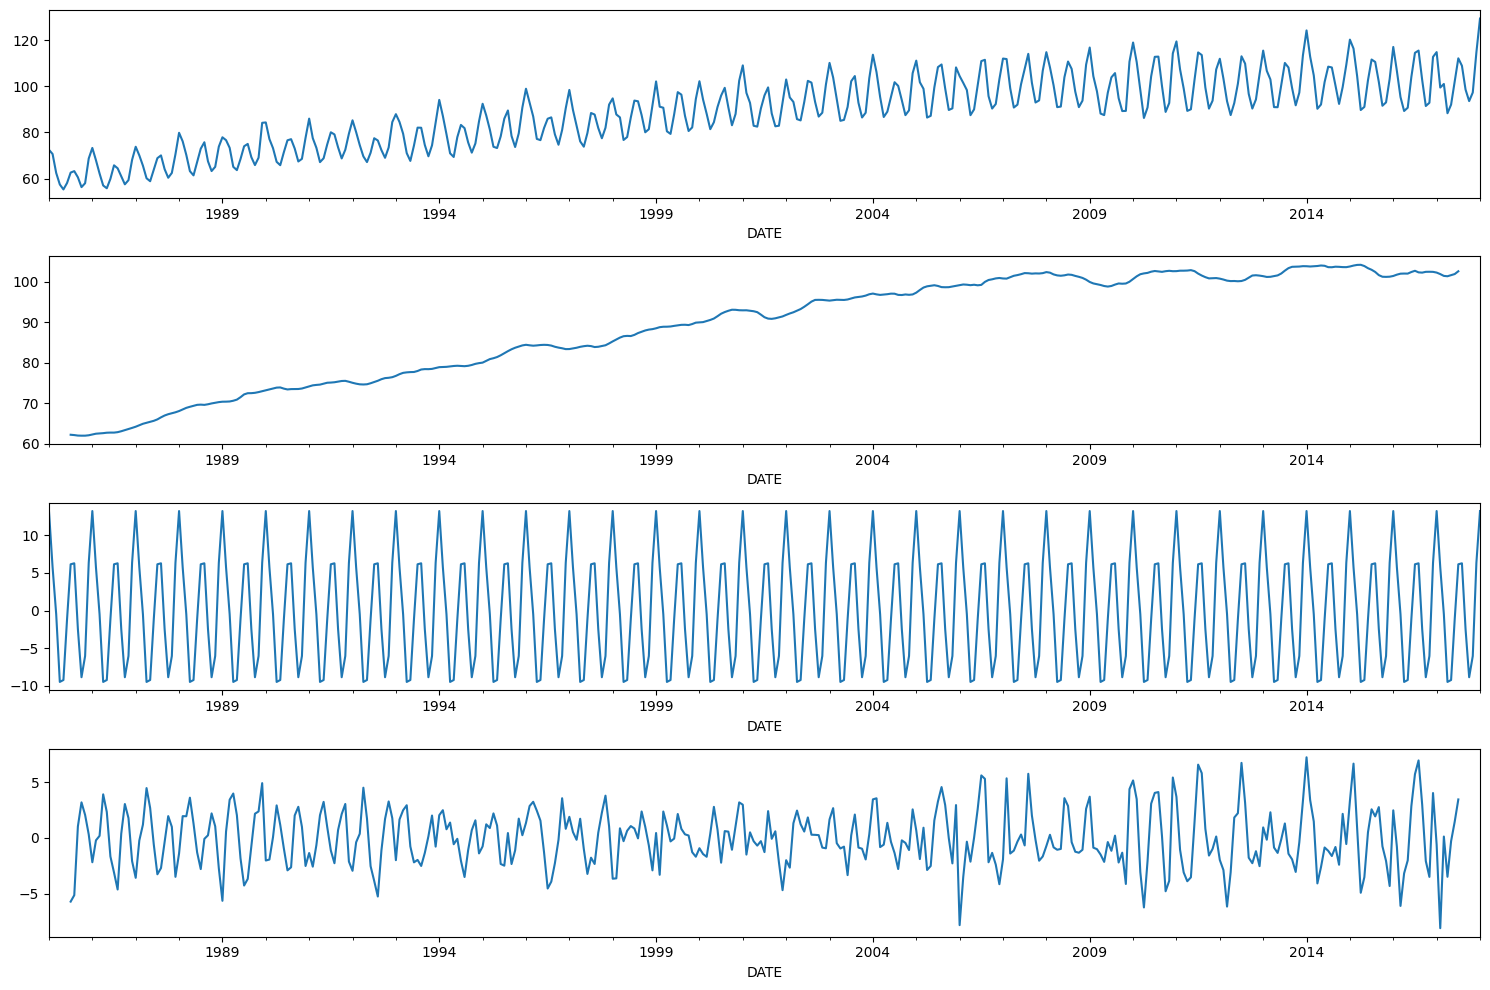

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15,10))

results.observed.plot(ax=ax1)
results.trend.plot(ax=ax2)
results.seasonal.plot(ax=ax3)
results.resid.plot(ax=ax4)

plt.tight_layout()

**ADF (Augmented Dickey-Fuller)**

    H0 -> Hipótese Nula (não é estacionária)
    H1 -> Hipótese Alternativa (rejeição da hipótese nula: é estacionária)

- p value < 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [13]:
# Estacionaria ou não estacionaria - estacionaria: média, variancia e co-variancia são constantes
from statsmodels.tsa.stattools import adfuller

In [14]:
X = df.Value.values
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print(f"Valores críticos: ")

for key, value in result[4].items():
    print(f"\t{key}: {value}")
    
print("\n")
p_value = result[1]
if p_value < 0.05:
    print("Rejeitamos a H0 (hipótese nula).")
    print("A série é estacionária!")
else:
    print("H0: Hipótese nula.")
    print("A série não é estacionária!")

Teste ADF
Teste Estatístico: -2.256990350047241
P-Value: 0.18621469116586903
Valores críticos: 
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


H0: Hipótese nula.
A série não é estacionária!


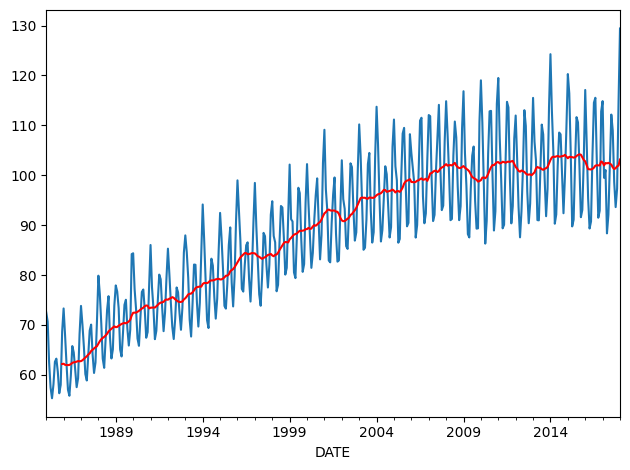

In [15]:
ma = df.rolling(12).mean()


f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()


In [16]:
ma[:15]

,Value
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN
1985-06-01,NaN
1985-07-01,NaN
1985-08-01,NaN
1985-09-01,NaN


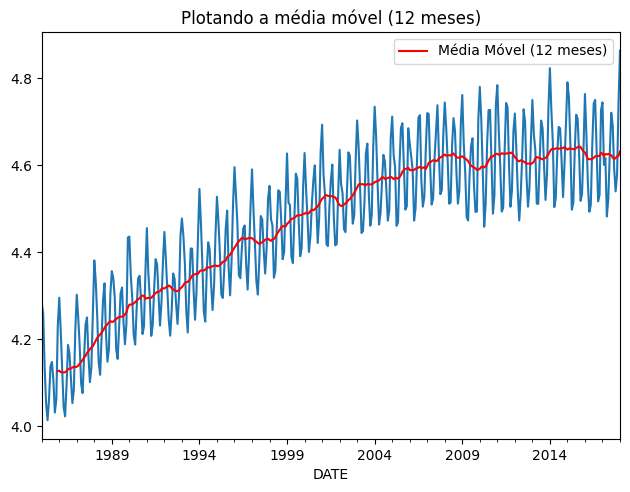

In [25]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

ma_log.rename(columns={'Value':'Média Móvel (12 meses)'}, inplace=True)

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=True, color='r')

plt.tight_layout()
plt.title("Plotando a média móvel (12 meses)")
plt.show()

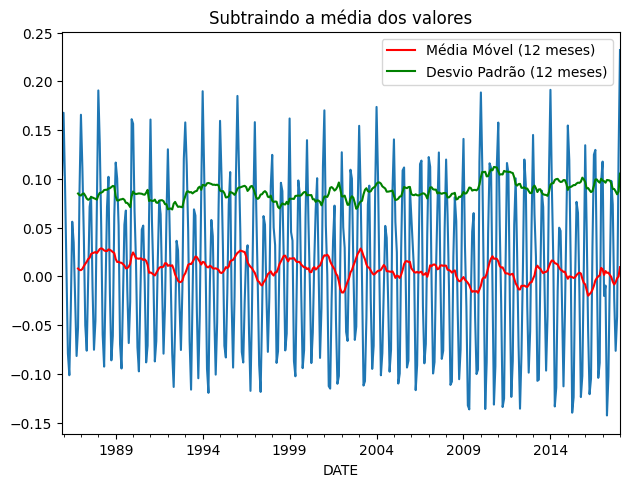

In [24]:
df_sub = (df_log - ma_log).dropna()

ma_sub = df_sub.rolling(12).mean()
std = df_sub.rolling(12).std()

ma_sub.rename(columns={'Value':'Média Móvel (12 meses)'}, inplace=True)
std.rename(columns={'Value':'Desvio Padrão (12 meses)'}, inplace=True)

f, ax = plt.subplots()
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, legend=True, color='r')
std.plot(ax=ax, legend=True, color='g')

plt.tight_layout()
plt.title("Subtraindo a média móvel dos valores")
plt.show()

In [19]:
X_s = df_sub.Value.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print(f"Valores críticos: ")

for key, value in result_s[4].items():
    print(f"\t{key}: {value}")
    

print("\n")
p_value = result_s[1]
if p_value < 0.05:
    print("Rejeitamos a H0 (hipótese nula).")
    print("A série é estacionária!")
else:
    print("H0: Hipótese nula.")
    print("A série não é estacionária!")

Teste ADF
Teste Estatístico: -5.211586185365429
P-Value: 8.325639759946488e-06
Valores críticos: 
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


Rejeitamos a H0 (hipótese nula).
A série é estacionária!


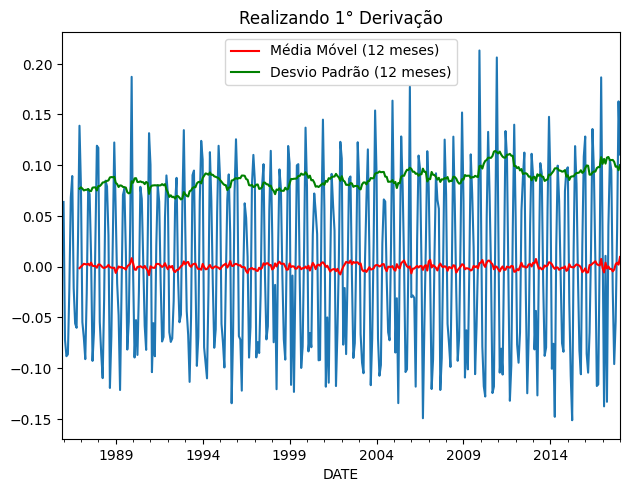

In [26]:
df_diff  = df_sub.diff(1) # primeira derivada
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

ma_diff.rename(columns={'Value':'Média Móvel (12 meses)'}, inplace=True)
std_diff.rename(columns={'Value':'Desvio Padrão (12 meses)'}, inplace=True)

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=True, color='r')
std_diff.plot(ax=ax, legend=True, color='g')

plt.tight_layout()
plt.title("Realizando 1° Derivação")
plt.show()

In [21]:
X_diff = df_diff.Value.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print(f"Valores críticos: ")

for key, value in result_diff[4].items():
    print(f"\t{key}: {value}")
    

print("\n")
p_value = result_diff[1]
if p_value < 0.05:
    print("Rejeitamos a H0 (hipótese nula).")
    print("A série é estacionária!")
else:
    print("H0: Hipótese nula.")
    print("A série não é estacionária!")

Teste ADF
Teste Estatístico: -7.651129568145197
P-Value: 1.78812673543548e-11
Valores críticos: 
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


Rejeitamos a H0 (hipótese nula).
A série é estacionária!
